# Support Materials

<span style="text-transform: uppercase;
        font-size: 14px;
        letter-spacing: 1px;
        font-family: 'Segoe UI', sans-serif;">
    Author
</span><br>
efrén cruz cortés
<hr style="border: none; height: 1px; background: linear-gradient(to right, transparent 0%, #ccc 10%, transparent 100%); margin-top: 10px;">

In [3]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### Standardized vs non-standardized data

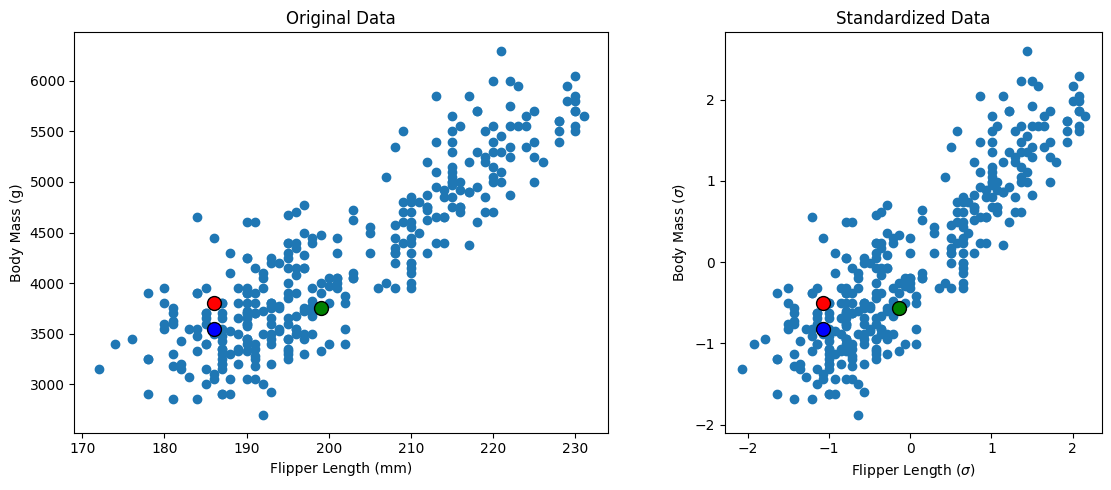

In [2]:
penguins_df = pd.read_csv("data/penguins.csv")

# Pick variables to visualize
var1 = 'flipper_length_mm'
var2 = 'body_mass_g'
penguins_df[[var1, var2]].head()

# Pick sample points to track in our visualization
sample_idx = [1, 50, 100]
sample_colors = ['red', 'blue', 'green']
sample_points = [np.array([penguins_df[var1].iloc[idx], penguins_df[var2].iloc[idx]]) for idx in sample_idx]

# Standardize data
z_scaler = preprocessing.StandardScaler()
z_scaler.fit(penguins_df[[var1, var2]])
z = z_scaler.transform(penguins_df[[var1, var2]])

# Plot the original and standardized data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(penguins_df[var1], penguins_df[var2])
ax2.scatter(z[:,0], z[:, 1])

# Add some sample points for comparison
for idx, color, (px, py) in zip(sample_idx, sample_colors, sample_points):
    ax1.scatter(px, py, color=color, s=100, edgecolors='black')
    ax2.scatter(z[idx, 0], z[idx, 1], color=color, s=100, edgecolors='black')

# Some aesthetics:
ax1.set(
    xlabel = 'Flipper Length (mm)',
    ylabel = 'Body Mass (g)',
    title = 'Original Data',
)
ax2.set(
    xlabel = 'Flipper Length ($\sigma$)',
    ylabel = 'Body Mass ($\sigma$)',
    title = 'Standardized Data',
    aspect= 'equal'
)

fig.tight_layout()

### Classification Visualization

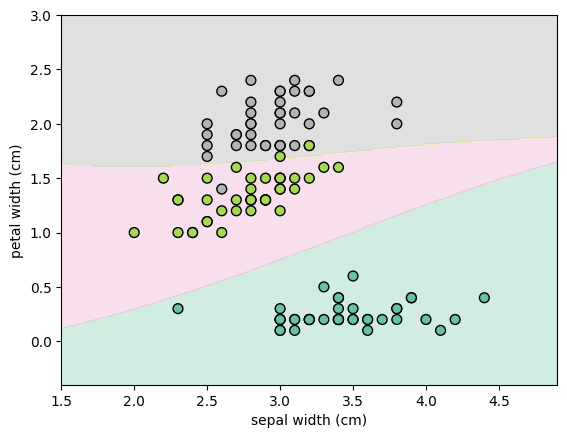

In [4]:
# Let's use iris
iris = datasets.load_iris()
iris.feature_names

# You can choose which two features to keep, I'll pick the widths
iris_feats = [1,3]
iris_X = iris.data[:,iris_feats]

# create the classifier
irisx_train, irisx_test, irisy_train, irisy_test = train_test_split(iris_X, iris.target, test_size=.2)
iris_clf = svm.SVC().fit(irisx_train, irisy_train)

# create the plane coordinates based on the observed values
grid_size = 300
s1_axis = np.linspace(iris_X[:,0].min() - .5, iris_X[:,0].max() + .5, num=grid_size)
s2_axis = np.linspace(iris_X[:,1].min() - .5, iris_X[:,1].max() + .5, num=grid_size)
ss1, ss2 = np.meshgrid(s1_axis, s2_axis)
grid = np.c_[ss1.ravel(), ss2.ravel()]

# Evaluate your classifier on all coordinate points
Z = iris_clf.predict(grid).reshape(ss1.shape)

# Plot class predictions over all space
plt.contourf(ss1, ss2, Z, alpha=.6, cmap='Pastel2')
plt.scatter(irisx_train[:, 0], irisx_train[:, 1], c=irisy_train, cmap='Set2', edgecolor='k', s=50)
plt.xlabel(iris.feature_names[iris_feats[0]])
plt.ylabel(iris.feature_names[iris_feats[1]])
plt.show()

### Imbalanced Set - Wine (Italy)
Create Imbalance set from wine

In [ ]:
# Step 1: Load the data
wine = datasets.load_wine(as_frame=True)
wine_df = wine.frame

# Step 2: Drop third class
wine_df = wine_df[wine_df['target'].isin([0,1])]

# Step 3: Subsample the second class
downsample_n = 10
class_0 = wine_df[wine_df['target'] == 0]
class_1 = wine_df[wine_df['target'] == 1].sample(n=downsample_n)

# Step 4: Make mock data
imbalanced_df = pd.concat([class_0, class_1], ignore_index=True)
X_imb = imbalanced_df.drop(columns='target')
y_imb = imbalanced_df['target']

save_yn = 0
if save_yn:
    imbalanced_df.to_csv(f'data/imbalanced_wine_{downsample_n}.csv', index=False)

### (Binary Classification) Portuguese Wine

In [ ]:
red_wine = pd.read_csv('data/wine_quality/winequality-red.csv', sep=';')
quality_threshold = 7
red_wine['quality'] = (red_wine['quality'] >= quality_threshold).astype(int)
save_wine_bin = 0
if save_wine_bin:
    red_wine.to_csv('data/red_wine_binary.csv', index=False)

### (Binary Classification) Portuguese Wine - Imbalanced

In [ ]:
red_wine = pd.read_csv('data/wine_quality/winequality-red.csv', sep=';')
high_quality_threshold = 8
red_wine['quality'] = (red_wine['quality'] >= high_quality_threshold).astype(int)
save_wine_bin = 0
if save_wine_bin:
    red_wine.to_csv('data/red_wine_binary_imbalanced.csv', index=False)

### Cross-validation visual examples

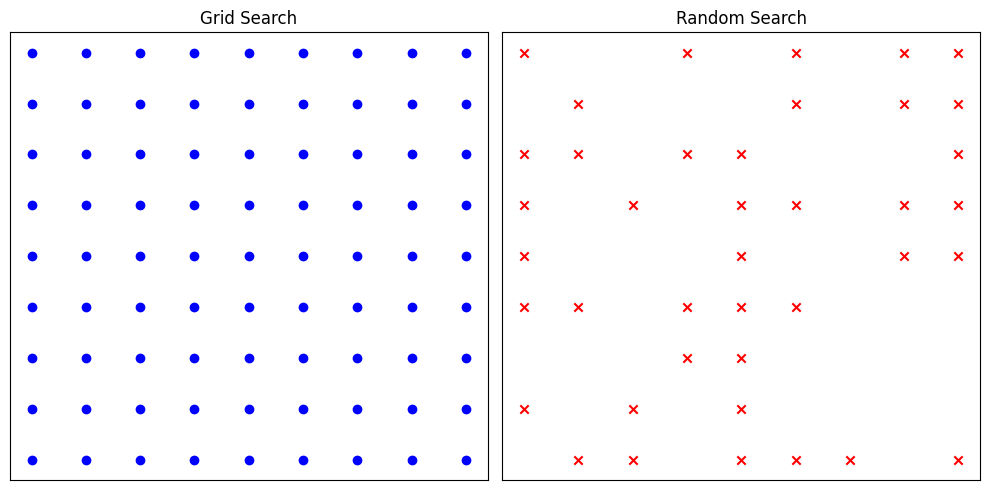

In [34]:
# hyperparameter grid vs random
H1 = list(range(1, 10)) # First hyperparamter values
H2 = list(range(1, 10))

grid_points = [(h1, h2) for h1 in H1 for h2 in H2] # full grid
num_random_points = 40
random_points = random.sample(grid_points, num_random_points) # random sample from grid points

# plot
grid_x, grid_y = zip(*grid_points)
rand_x, rand_y = zip(*random_points)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Grid plot
axs[0].scatter(grid_x, grid_y, c='blue', marker='o')
axs[0].set_title("Grid Search")
axs[0].set_xticks([])
axs[0].set_yticks([])
# Random search plot
axs[1].scatter(rand_x, rand_y, c='red', marker='x')
axs[1].set_title('Random Search')
axs[1].set_yticks([])
axs[1].set_xticks([])

plt.tight_layout()
plt.show()